### Import packages

In [1]:
# data processing
import pandas as pd

# modeling
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

# plotting
import matplotlib.pyplot as plt
import seaborn as sns

### Set-up

In [2]:
infile = 'https://bitbucket.org/vishal_derive/vcu-data-mining/raw/3d740375d8d00c80e83dacbadc8b5e70cd2bfe48/data/credit_default_model_data.csv'

target = 'default payment next month'

sns.set(style='darkgrid')

### Read data

In [3]:
df = pd.read_csv(infile)

df.head()

,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,...,pay_bucket_-2_flag,pay_bucket_-1_flag,pay_amt_total,bill_amt_total,pay_to_billed_ratio,zero_bill_amount,utilization_avg,utilization_max,group,default payment next month
0,40000,28,10371,11895,11228,2475,5341,6255,2567,0,...,0,1,11883,47565,0.249827,0,0.198187,0.297375,M,1
1,320000,35,12233,16490,20011,17918,18627,19167,7000,4100,...,0,0,15100,104446,0.144572,0,0.054399,0.062534,M,0
2,260000,35,188,188,188,188,194,188,188,188,...,0,1,1167,1134,1.029101,0,0.000727,0.000746,M,0
3,360000,36,308711,305594,306176,304645,315118,315782,11000,13000,...,0,0,71322,1856026,0.038427,0,0.859271,0.877172,M,0
4,500000,25,-46,9412,1260,0,1121,6566,9458,1260,...,0,1,20839,18313,1.137935,0,0.006104,0.018824,M,0


In [4]:
X = df.drop([target, 'group'], axis=1)

del df
X.shape

(30000, 55)

In [5]:
# we will take a sample for this exercise (to save time on code execution)
X = X.sample(10000, random_state=123)
X.shape

(10000, 55)

### Standardize

In [6]:
X_scaler = StandardScaler()

# this will subtract the mean and divide by the standard deviation (for each column)
X_std = X_scaler.fit_transform(X)

### k-means Clustering

In [7]:
# choose a range for number of principal components
range_pca = [10, 15, 20, 25, 30, 35, 40, 45, 50]

# choose a range for number of clusters
range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10]

# create a dataframe to store the silhouette scores for each combination
silhouette_matrix = pd.DataFrame(index=range_pca, columns=range_n_clusters)


def perform_clus(components_to_keep_all, range_n_clusters_all):

    # for each number of principal components
    for components_to_keep in components_to_keep_all:

        pca = PCA(n_components=components_to_keep, random_state=314)

        X_pca = pca.fit_transform(X_std)

        # for each number of clusters
        for n_clus in range_n_clusters_all:

            # define the k-means model
            km = KMeans(n_clusters=n_clus, random_state=314)

            # assigned a cluster number to each record
            clus_labels = km.fit_predict(X_pca)

            # overall (average) Silhouette score
            silhouette_avg = silhouette_score(X_pca, clus_labels)
            
            silhouette_matrix.loc[components_to_keep, n_clus] = silhouette_avg

            print('Components:', components_to_keep, ', Clusters:', n_clus, ', Silhouette Score:', silhouette_avg)

    
perform_clus(range_pca, range_n_clusters)

Components: 10 , Clusters: 2 , Silhouette Score: 0.20381596649413583
Components: 10 , Clusters: 3 , Silhouette Score: 0.20977905953129908
Components: 10 , Clusters: 4 , Silhouette Score: 0.21605028565520557
Components: 10 , Clusters: 5 , Silhouette Score: 0.2230575644637329
Components: 10 , Clusters: 6 , Silhouette Score: 0.21805726399430186
Components: 10 , Clusters: 7 , Silhouette Score: 0.1684379502666985
Components: 10 , Clusters: 8 , Silhouette Score: 0.2261046041419921
Components: 10 , Clusters: 9 , Silhouette Score: 0.19865793729437733
Components: 10 , Clusters: 10 , Silhouette Score: 0.20892506045020165
Components: 15 , Clusters: 2 , Silhouette Score: 0.17561039337863182
Components: 15 , Clusters: 3 , Silhouette Score: 0.17841781557573613
Components: 15 , Clusters: 4 , Silhouette Score: 0.1823060838354791
Components: 15 , Clusters: 5 , Silhouette Score: 0.18684763258490825
Components: 15 , Clusters: 6 , Silhouette Score: 0.17958896481732137
Components: 15 , Clusters: 7 , Silhou

In [8]:
silhouette_matrix

,2,3,4,5,6,7,8,9,10
10,0.203816,0.209779,0.21605,0.223058,0.218057,0.168438,0.226105,0.198658,0.208925
15,0.17561,0.178418,0.182306,0.186848,0.179589,0.1835,0.165145,0.173535,0.162316
20,0.16949,0.17111,0.174486,0.177513,0.175065,0.178741,0.170199,0.182763,0.168655
25,0.159903,0.159196,0.16136,0.167116,0.166612,0.166601,0.164815,0.170434,0.154823
30,0.151955,0.150135,0.152387,0.14347,0.151568,0.154009,0.155569,0.158326,0.164144
35,0.144411,0.141434,0.143307,0.13893,0.146401,0.117339,0.124228,0.13793,0.135792
40,0.143784,0.140156,0.141908,0.137523,0.145411,0.13992,0.145886,0.104823,0.0983065
45,0.14333,0.139482,0.141478,0.140595,0.151188,0.151357,0.113743,0.120165,0.114237
50,0.142566,0.139362,0.152441,0.14031,0.142863,0.149268,0.147475,0.148755,0.149606


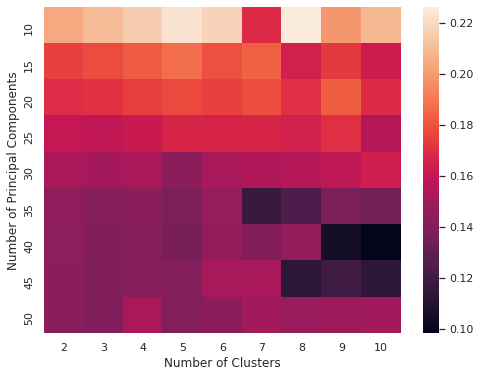

In [9]:
# create a heat map
plt.figure(figsize=(8, 6))

ax = sns.heatmap(silhouette_matrix.astype(float))
ax.set_ylim(len(silhouette_matrix), 0)
ax.set_xlabel('Number of Clusters')
ax.set_ylabel('Number of Principal Components');

In [10]:
# max score within each row (max value across columns)
silhouette_matrix.max(axis=1)

10    0.226105
15    0.186848
20    0.182763
25    0.170434
30    0.164144
35    0.146401
40    0.145886
45    0.151357
50    0.152441
dtype: float64

10 principal components generated the highest score.

In [11]:
# the first row (index=10) has the highest score
# let's extract that row
silhouette_matrix.loc[10, :]

2     0.203816
3     0.209779
4      0.21605
5     0.223058
6     0.218057
7     0.168438
8     0.226105
9     0.198658
10    0.208925
Name: 10, dtype: object

In [12]:
# find the column name where silhuette score is max
silhouette_matrix.astype(float).idxmax(axis=1)

10     8
15     5
20     9
25     9
30    10
35     6
40     8
45     7
50     4
dtype: int64

`idxmax()` returns the index of first occurrence of maximum over requested axis.

10 principal components and 8 clusters generated the highest score.

In [13]:
# best values that generated the highest Silhuette score
n_compoments = 10 
k = 5  # trying to keep the number of clusters small (picking 5 clusters instead of 8)

In [14]:
pca = PCA(n_components=n_compoments, random_state=314)

X_pca = pca.fit_transform(X_std)

# define the k-means model
km = KMeans(n_clusters=k, random_state=314)

# get assigned cluster numbers for each record
clus_labels = km.fit_predict(X_pca)

# overall (average) Silhouette score
silhouette_avg = silhouette_score(X_pca, clus_labels)

print(silhouette_avg)

0.2230575644637329


In [15]:
clus_labels[:10]

array([0, 0, 0, 1, 2, 2, 0, 0, 2, 1], dtype=int32)

In [16]:
# add one to cluster numbers (so that it starts at 1 instead of 0)
X['cluster'] = clus_labels + 1

X.head()

,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,...,pay_bucket_8_flag,pay_bucket_-2_flag,pay_bucket_-1_flag,pay_amt_total,bill_amt_total,pay_to_billed_ratio,zero_bill_amount,utilization_avg,utilization_max,cluster
25665,20000,22,19568,19420,15535,1434,500,0,4641,1019,...,0,0,0,8060,56457,0.142764,0,0.470475,0.978400,1
16464,430000,30,62774,68284,74806,82241,80298,53289,10284,10806,...,0,0,0,88375,421692,0.209572,0,0.163447,0.191258,1
22386,20000,22,12476,14951,14426,16471,15909,17151,3000,0,...,0,0,0,7100,91384,0.077694,0,0.761533,0.857550,1
10149,290000,49,282538,281749,238490,86202,83155,84927,10711,12915,...,0,0,0,35704,1057061,0.033777,0,0.607506,0.974269,2
8729,230000,26,0,500,500,624,1090,2952,500,0,...,0,0,1,6671,5666,1.177374,0,0.004106,0.012835,3


In [17]:
# number of records by cluster
X.cluster.value_counts()

1    4714
3    3681
2    1239
4     349
5      17
Name: cluster, dtype: int64

In [18]:
# % of records by cluster
X.cluster.value_counts() / len(X)

1    0.4714
3    0.3681
2    0.1239
4    0.0349
5    0.0017
Name: cluster, dtype: float64

### Cluster Profiles

In [19]:
pd.options.display.float_format = '{:.2f}'.format

clus_profile = X.groupby('cluster').mean().T
clus_profile.head()

cluster,1,2,3,4,5
LIMIT_BAL,104283.41,272427.51,223257.27,69226.36,93529.41
AGE,34.61,36.36,36.54,34.87,33.24
BILL_AMT1,48334.64,189169.45,8464.33,32046.22,89925.53
BILL_AMT2,46102.00,186802.02,6533.97,32701.96,87839.94
BILL_AMT3,42479.76,181575.50,6134.50,32513.82,85303.76


In [20]:
clus_profile['overall'] = X.mean().T
clus_profile.head()

cluster,1,2,3,4,5,overall
LIMIT_BAL,104283.41,272427.51,223257.27,69226.36,93529.41,167668.97
AGE,34.61,36.36,36.54,34.87,33.24,35.54
BILL_AMT1,48334.64,189169.45,8464.33,32046.22,89925.53,50610.05
BILL_AMT2,46102.00,186802.02,6533.97,32701.96,87839.94,48573.03
BILL_AMT3,42479.76,181575.50,6134.50,32513.82,85303.76,46060.02


In [21]:
# index 
clus_indices = clus_profile[[1, 2, 3, 4, 5]].div(clus_profile['overall'], axis=0) * 100
clus_indices.head()

cluster,1,2,3,4,5
LIMIT_BAL,62.20,162.48,133.15,41.29,55.78
AGE,97.37,102.30,102.80,98.10,93.51
BILL_AMT1,95.50,373.78,16.72,63.32,177.68
BILL_AMT2,94.91,384.58,13.45,67.33,180.84
BILL_AMT3,92.23,394.21,13.32,70.59,185.20


Customers in cluster 3 have 33% higher balance limit as compared to the overall population. This type of information can be used to provide detailed descriptions for each cluster (aka cluster profile).